## This notebook tried to reproduce simplified SEI model in the Single 2018 paper

In [12]:
# import pybamm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl; 
fs=17
font = {'family' : 'DejaVu Sans',  'size'   : fs}
mpl.rc('font', **font)

In [13]:
# write functions from Single 2018 paper
# note that all three diffusion limited model share the same expression 
F = 96485.33289
R = 8.314
s = 2
V = 95.86e-6 # partial molar voumne of SEI (unit is wrong in original paper) 
fan_L = np.sqrt(2*s*F/V)
A = 14.34 # surface area of negative electrode. unit: m2

def Q_loss_solvent(D_EC, c_EC, t):
    Q_loss = A * fan_L * np.sqrt(F*D_EC*c_EC)* np.sqrt(t) 
    return Q_loss

def Q_loss_migration(U_n, kappa, U_SEI, t):
    Q_loss = A * fan_L * np.sqrt( kappa*(U_SEI-U_n) )* np.sqrt(t) 
    return Q_loss

def Q_loss_interstitial(U_n, D_Li, c_Li_0, T, t):
    Q_loss = (
        A * fan_L * np.sqrt( F*D_Li*c_Li_0 )
        * np.exp(  -F*U_n/(2*R*T)  )
        * np.sqrt(t)  )
    return Q_loss


### total missing in the paper
1. c_EC - assumed 2326
2. tau - time constant - ignore here
3. Q_SEI_irr : initial irreversible capacity loss to SEI - ignore here
4. alpha and beta for electron tunneling, ignore electron tunneling completely


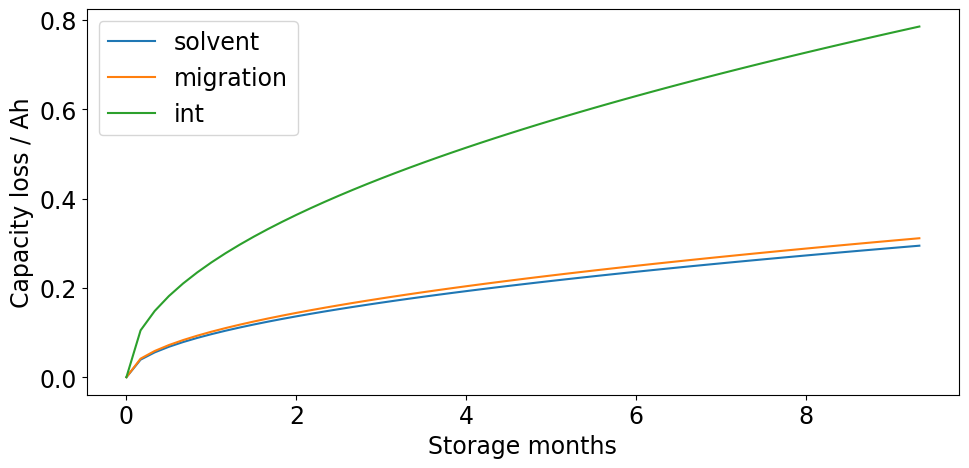

In [14]:
import matplotlib.pyplot as plt
t = np.arange(1, 3600*24*30*9.5, 3600*8*15) / 1.0
c_EC = 2326 # this is missing in original paper
D_EC = 2.5e-22
U_n = 0.1 # negative OCP at given SOC
kappa = 8.95e-14 # SEI conductivity. Unit: S/m
U_SEI = 0.8 # Onset potential of SEI formation vs. Li/Li+
D_Li = 1E-17 # Diffusion coefficient of Li_I in the SEI. Unit: m2/s
c_Li_0 = 15 # LiI concentration at 0 V vs Li/Li+
T = 323.15


fig, axs = plt.subplots( figsize=(10,5),tight_layout=True)
axs.plot(
    t/3600/24/30, 
    Q_loss_solvent(D_EC, c_EC, t)/3600,
    label = "solvent")
axs.plot(
    t/3600/24/30, 
    Q_loss_migration(U_n, kappa, U_SEI, t)/3600,
    label = "migration")
axs.plot(
    t/3600/24/30, 
    Q_loss_interstitial(U_n, D_Li, c_Li_0, T, t)/3600,
    label = "int")
axs.set_ylabel("Capacity loss / Ah")
axs.set_xlabel("Storage months")
axs.legend( loc='best')
#axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [15]:
t = np.arange(1, 3600*24*30*9.5, 3600*24*15) / 1.0
print(len(t))

19


In [16]:
Q_0_Ah = 10080 / 3600
print(Q_0_Ah , 0.08*Q_0_Ah)

2.8 0.22399999999999998
